In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from copy import deepcopy
sns.set()#for plot styling
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"]=(16,9)
plt.style.use('ggplot')

#importing the data set
data=pd.read_csv("movie_metadata.csv")
print(data.shape)
print(data.head)

(5043, 28)
<bound method NDFrame.head of       color      director_name  num_critic_for_reviews  ...  imdb_score  aspect_ratio  movie_facebook_likes
0     Color      James Cameron                   723.0  ...         7.9          1.78                 33000
1     Color     Gore Verbinski                   302.0  ...         7.1          2.35                     0
2     Color         Sam Mendes                   602.0  ...         6.8          2.35                 85000
3     Color  Christopher Nolan                   813.0  ...         8.5          2.35                164000
4       NaN        Doug Walker                     NaN  ...         7.1           NaN                     0
...     ...                ...                     ...  ...         ...           ...                   ...
5038  Color        Scott Smith                     1.0  ...         7.7           NaN                    84
5039  Color                NaN                    43.0  ...         7.5         16.00          

In [4]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
data["director_facebook_likes"]

0           0.0
1         563.0
2           0.0
3       22000.0
4         131.0
         ...   
5038        2.0
5039        NaN
5040        0.0
5041        0.0
5042       16.0
Name: director_facebook_likes, Length: 5043, dtype: float64

In [8]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [11]:
newdata=data.iloc[:,4:6]

In [12]:
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN
...,...,...
5038,2.0,318.0
5039,NaN,319.0
5040,0.0,0.0
5041,0.0,489.0


In [21]:
newdata.isnull().sum()

director_facebook_likes    104
actor_3_facebook_likes      23
dtype: int64

In [22]:
newdata.dropna(inplace=True)

In [25]:
newdata.isnull().sum()

director_facebook_likes    0
actor_3_facebook_likes     0
dtype: int64

In [23]:
#using Kmeans from sklearn
from sklearn.cluster import KMeans

In [24]:
kmeans=KMeans(n_clusters=5)

In [26]:
kmeans.fit(newdata)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [28]:
kmeans.cluster_centers_


array([[  153.94452806,   424.19264674],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17545.45454545, 14545.45454545],
       [17621.21212121,   596.10606061]])

In [29]:
print(len(kmeans.cluster_centers_))

5


In [30]:
print(kmeans.labels_)

[0 0 0 ... 0 0 0]


In [31]:
print(len(kmeans.labels_))

4919


In [32]:
print(type(kmeans.labels_))

<class 'numpy.ndarray'>


In [33]:
uniquie,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(uniquie,counts)))

{0: 4651, 1: 104, 2: 87, 3: 11, 4: 66}


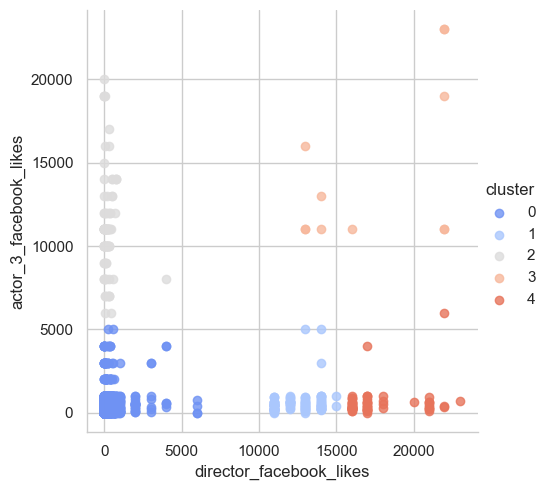

In [38]:
#plot the data
newdata["cluster"]=kmeans.labels_
sns.set_style("whitegrid")
sns.lmplot(x="director_facebook_likes",y="actor_3_facebook_likes",data=newdata,hue="cluster"
           ,palette="coolwarm",aspect=1,fit_reg=False)#size=6 raises error